In [58]:
#importing all the essential modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.multioutput import MultiOutputClassifier


In [14]:
#reading the data
raw_data = pd.read_csv('Customer_churn.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
#checking for a nan value
raw_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [106]:
#converting data to numeric
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors='coerce')
raw_data.drop(columns=['customerID'], errors='ignore', inplace=True)


In [107]:
#assigning the independent and dependent varibles
real_data = raw_data.copy()
y = real_data['Churn'].map({'Yes': 1, 'No': 0})
X = real_data.drop('Churn', axis=1)
X = pd.get_dummies(X, drop_first=True)

In [108]:
#using train test split method for testing and training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [109]:
#assinging the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)


In [110]:
#Doing evaluation for the model 
print("Accuracy:", accuracy_score(y_test, y_predict))


Accuracy: 0.7984386089425124


In [111]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [112]:
# now confusion matrix
cnf_matrix = confusion_matrix(y_test,y_predict,labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

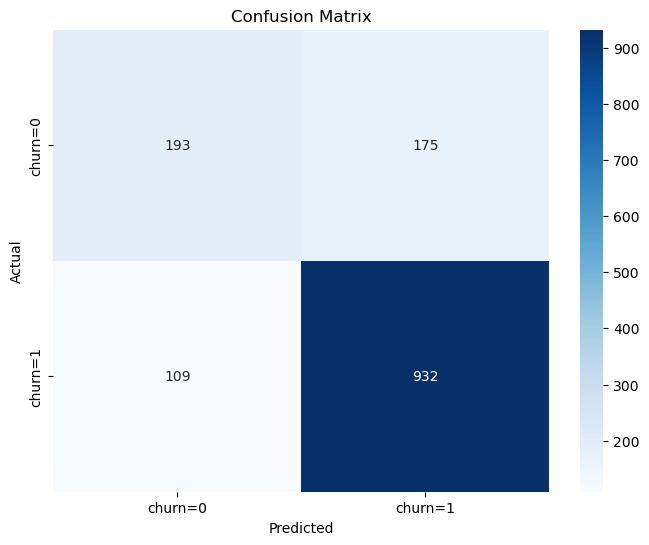

In [104]:
#figure of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['churn=0', 'churn=1'],
            yticklabels=['churn=0', 'churn=1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()